# Relatório Final

### Inteligência Computacional II

#### Aluna: Vilma Bezerra


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

## Experimento 1

In [4]:
data = pd.read_csv('banana.dat', header=None)

### Parte 1 

#### Geração da base de dados Banana

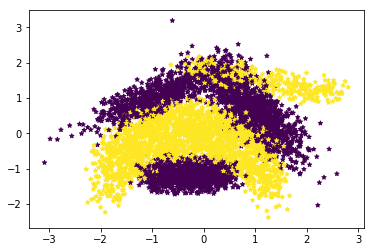

In [5]:
plt.scatter(data[0], data[1], c= data[2],  
            marker= "*", s=20) 

Pode-se observar que os dados já se encontram num certo padrão que é de certa forma desafiador para uma aplicação eficaz de um modelo de classificação.

### Parte 2

#### Testando SVM e seus diferentes kernels na separação dos dados

In [14]:
classifiers = {
    "Sigmoid - gamma 1": SVC(kernel='sigmoid', gamma=1), 
    "Sigmoid - gamma .5": SVC(kernel='sigmoid', gamma=0.5), 
    "Sigmoid - gamma .01": SVC(kernel='sigmoid', gamma=.01),
    "RBF": SVC(),
    "Poly":SVC(kernel='poly', degree=3),
}
X, y = data.values[:, :2], data.values[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
Ks = [2, 5, 10]
min_Val = 1.0
max_Val = 0.0
for name, clf in classifiers.items():
    print('\n CLASSIFIER: ', name)
    for k in Ks:
        print('K: ', k)
        kf = KFold(n_splits=k)
        iterations_score = []
        iterations_eout = []
        for train_index, val_index in kf.split(X_train):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            clf.fit(X_train, y_train)
            iterations_score.append(clf.score(X_val, y_val))
            iterations_eout.append(1 - clf.score(X_test, y_test))
            
        iter_Eout = np.mean(iterations_eout)
        iter_Val = np.mean(iterations_score)
        print('Average Score: ', iter_Val)
        print('Average Eout: ', iter_Eout)
        if iter_Val < min_Val:
            min_Val = iter_Val
            print('We got a worse result:', min_Val)
        if iter_Val > max_Val:
            max_Val = iter_Val
            print('We got a better result:', max_Val)
        


 CLASSIFIER:  Sigmoid - gamma 1
K:  2
Average Score:  0.28537735849056606
Average Eout:  0.7311320754716981
We got a worse result: 0.28537735849056606
We got a better result: 0.28537735849056606
K:  5
Average Score:  0.2783018867924528
Average Eout:  0.7349056603773585
We got a worse result: 0.2783018867924528
K:  10
Average Score:  0.2753846153846154
Average Eout:  0.7315094339622641
We got a worse result: 0.2753846153846154

 CLASSIFIER:  Sigmoid - gamma .5
K:  2
Average Score:  0.29601222784132625
Average Eout:  0.7150943396226415
We got a better result: 0.29601222784132625
K:  5
Average Score:  0.26961644306845545
Average Eout:  0.7184905660377359
We got a worse result: 0.26961644306845545
K:  10
Average Score:  0.2630618720253834
Average Eout:  0.7227358490566038
We got a worse result: 0.2630618720253834

 CLASSIFIER:  Sigmoid - gamma .01
K:  2
Average Score:  0.5717193675889328
Average Eout:  0.4613207547169811
We got a better result: 0.5717193675889328
K:  5
Average Score:  0.5

### Parte 3

#### Gerando gráfico com piores e melhores resultados e seus vetores suportes

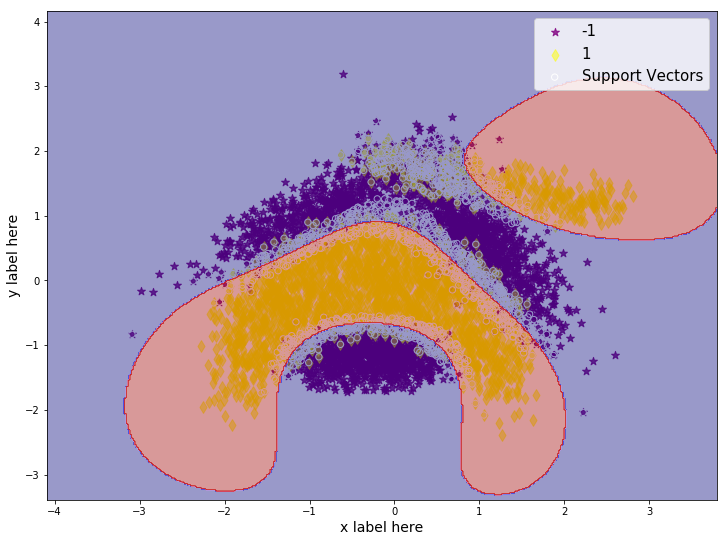

In [30]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# The best result: Sigmoid - gamma .5
X, y = data.values[:, :2], data.values[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
model = classifiers['RBF']
clf = model.fit(X, y)

fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_facecolor('white')
c_dict1={-1:'purple', 1: 'yellow'}
# title for the plots
title = ('Decision surface of RBF SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

Y_tar_list = y.tolist()
yl1 = [int(target1) for target1 in Y_tar_list]
labels1 = yl1

labl1 = {-1: '-1', 1: '1'}
marker1 = {-1: '*', 1: 'd'}
alpha1 = {-1:.8, 1:.5}

for l1 in np.unique(labels1):
    ix1 = np.where(labels1==l1)
    ax.scatter(X0[ix1], X1[ix1],c=c_dict1[l1], label=labl1[l1], 
               s=70, marker=marker1[l1], alpha=alpha1[l1])
    
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1], 
           label='Support Vectors', s=40, edgecolors='white', facecolor='none')

plot_contours(ax, clf, xx, yy, cmap='seismic', alpha=0.4)
plt.legend(fontsize=15)

plt.xlabel('x label here', fontsize=14)
plt.ylabel('y label here', fontsize=14)
plt.savefig('Classify Banana Set.png', dpi=300)
plt.show()
